In [1]:
from functions import *

# Epstein Plesset

In [64]:
def dRdt(t,R):
    alpha=10
    const = -1 
    # const = (-alpha*20./(rho_ice*L_f))
    return const*(1/R+1/np.sqrt(np.pi*alpha*t))

def stop_condition(t,R):
    return R[0]

stop_condition.terminal = True

tend = 1e15
sol = solve_ivp(dRdt,[1e-6,tend],[1000],dense_output=True,events=stop_condition)
sol

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 1.000e-06  7.940e-02 ...  3.454e+05  3.454e+05]
        y: [[ 1.000e+03  9.986e+02 ...  7.888e-05  4.870e-07]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fc0f1feba90>
 t_events: [array([ 3.454e+05])]
 y_events: [array([[ 4.870e-07]])]
     nfev: 698
     njev: 0
      nlu: 0

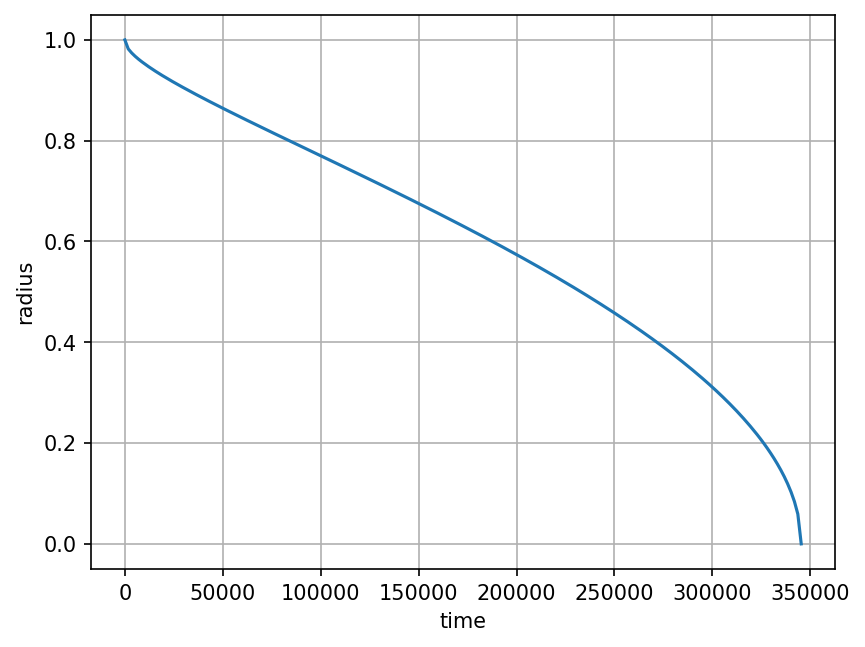

In [65]:
t = np.linspace(1e-6,sol.t_events[0][0],200)
# t = np.linspace(1e-6,tend,200)
plt.figure(dpi=150)
rEP = sol.sol(t)[0]
plt.plot(t,rEP/rEP[0], label='r(t)')
plt.grid()
plt.ylabel('radius')
plt.xlabel('time')
# plt.xlim(0,100)
plt.show()

# plt.figure(dpi=150)
# plt.plot(sol[:,1])
# # print(dRdt(0.0405,0.001))
# print((-alpha*20./(rho_ice*L_f)))
# print(1/0.0405+1/np.sqrt(np.pi*alpha*1e-15))
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


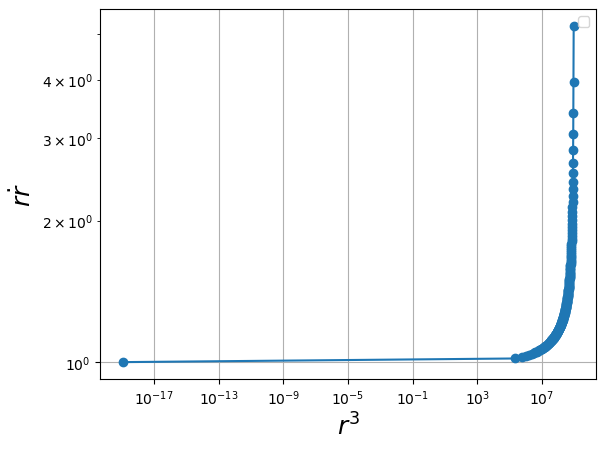

In [66]:
plt.plot((rEP**3)[1:],(-rEP*dRdt(t,rEP))[1:],
        marker = 'o')
# plt.plot(np.logspace(-6,-4),10**-5*np.logspace(-6,-4)**(1/3),
#         color='k',linestyle='--',label=r'$\propto 1/3$')
plt.ylabel(r'$r\dot{r}$',fontsize=18)
plt.xlabel(r'$r^3$',fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

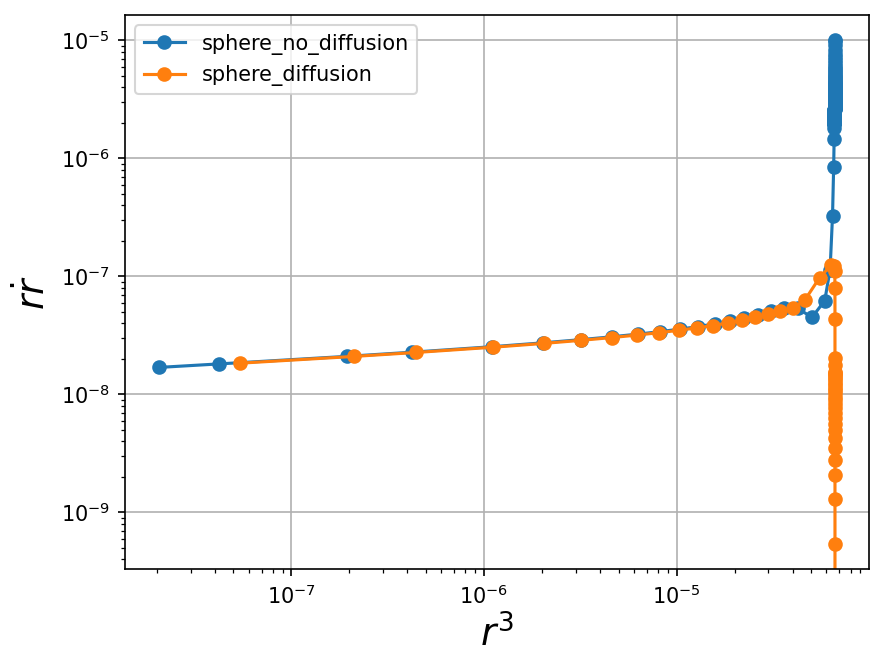

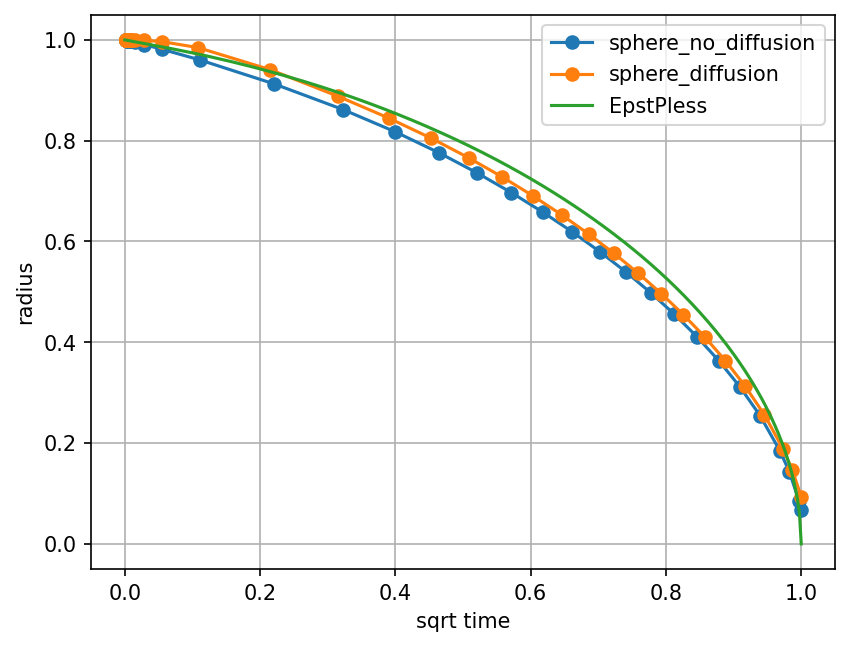

In [67]:
_,ax = plt.subplots(dpi=150)
_,ax1 = plt.subplots(dpi=150)
for typ in ['cylinder_no_diffusion','cylinder_diffusion','sphere_no_diffusion','sphere_diffusion']:
    if 'cyl' in typ: continue
    r,drdt = np.genfromtxt(f'/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/floating/codes/floatingIce/duarte/{typ}.txt')[2:,-2:].T
    time = np.genfromtxt(f'/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/floating/codes/floatingIce/duarte/{typ}.txt')[2:,0]
    # r = np.genfromtxt(f'/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/floating/codes/floatingIce/duarte/{typ}.txt')[1:,-2]
    ax1.plot(np.sqrt(time)/np.sqrt(time)[-1],r/r[0],label=f'{typ}',marker='o')
    # ax.plot(r**3,-r*np.gradient(r),label=f'{typ}')
    ax.plot(r**3,-r*drdt,label=f'{typ}',marker='o')
    # ax.scatter(time/time[-1],-r*drdt,label=f'{typ}',marker='o')


# ax.plot((rEP**3)[1:],(-rEP*dRdt(t,rEP))[1:],label='EpstPless',marker='o')  
ax1.plot(np.sqrt(t)/np.sqrt(t)[-1], rEP/rEP[0],label='EpstPless')
ax.set_ylabel(r'$r\dot{r}$',fontsize=18)
ax.set_xlabel(r'$r^3$',fontsize=18)
ax.set_yscale('log')
ax.set_xscale('log')
# ax.plot(np.logspace(-8,-5),10**-5*np.logspace(-8,-5.0)**(1/3),
#          color='k',linestyle='--',label=r'$\propto 1/3$')
for axi in [ax,ax1]:
    axi.legend()
    axi.grid()
# ax1.set_xlim(0,.1)
ax1.set_xlabel('sqrt time')
ax1.set_ylabel('radius')
# ax.set_xlim(1e-9,8e-5)
plt.show()


# Self-similar solution

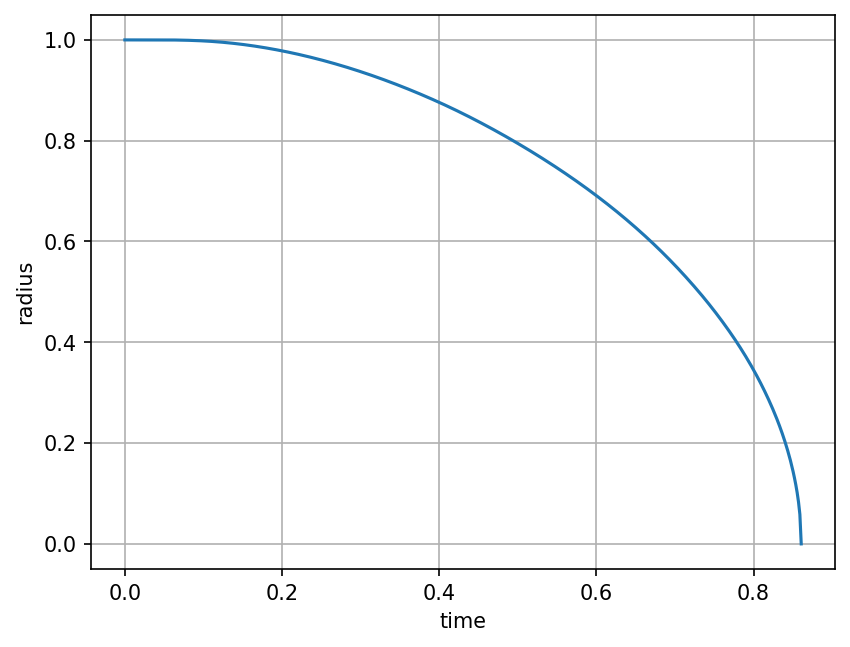

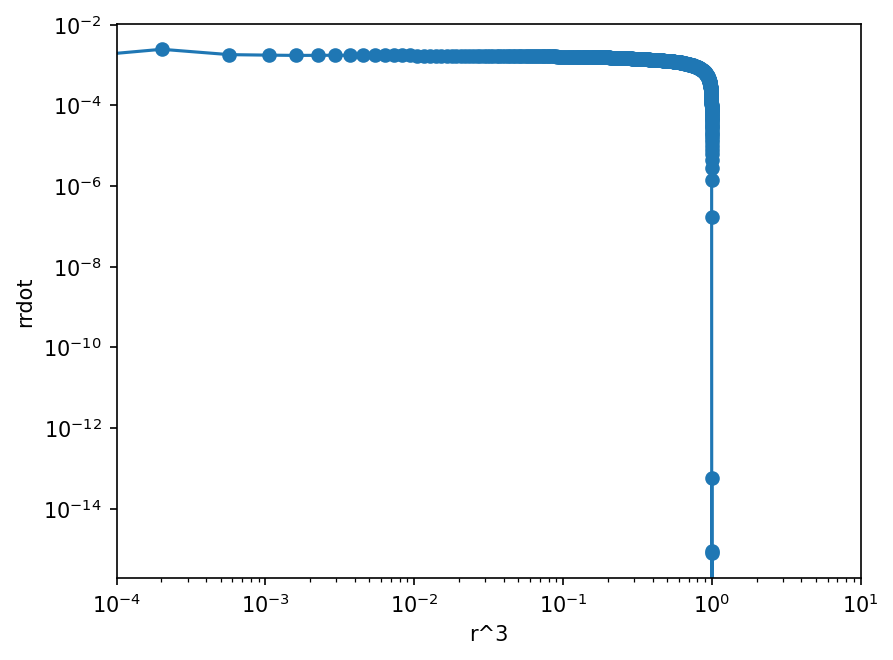

In [58]:
tend = 1
tstart = 1e-4

def dRdt(t,R):
    beta = 1
    alpha = 1 
    return -(beta/R)*np.exp(-R**2/(4*alpha*t))

def stop_condition(t,R):
    return R[0]

stop_condition.terminal = True

tend = 1e15
sol = solve_ivp(dRdt,[1e-6,tend],y0=[1],dense_output=True,events=stop_condition)
sol

t = np.linspace(1e-6,sol.t_events[0][0],500)
# t = np.linspace(1e-6,tend,200)
plt.figure(dpi=150)
rEP = sol.sol(t)[0]
plt.plot(t,rEP/rEP[0], label='r(t)')
plt.grid()
plt.ylabel('radius')
plt.xlabel('time')
# plt.xlim(0,100)
plt.show()

plt.figure(dpi=150)
plt.plot(rEP**3,-rEP*np.gradient(rEP),marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-4,1e1)
plt.ylabel('rrdot')
plt.xlabel('r^3')
plt.show()

# 1to1 comparison

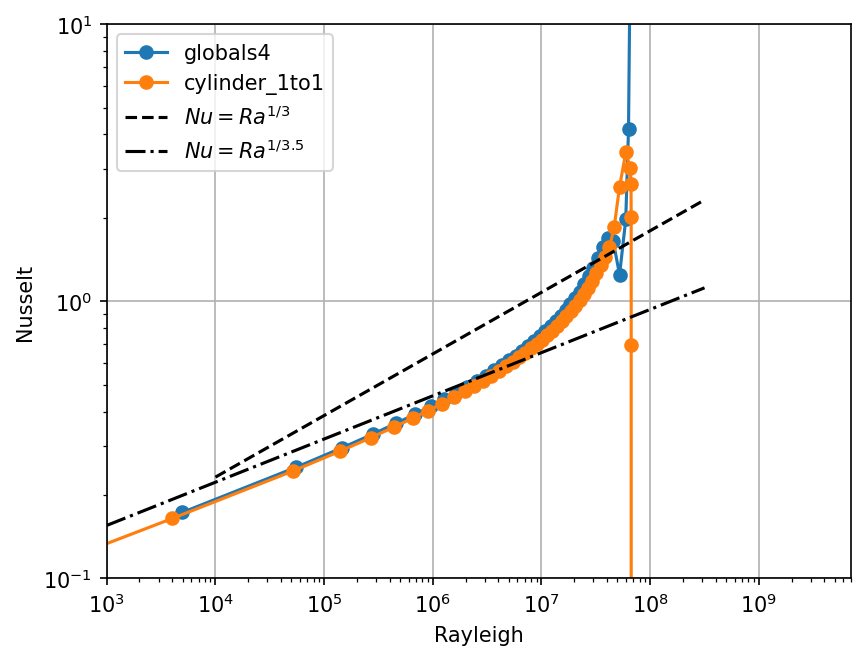

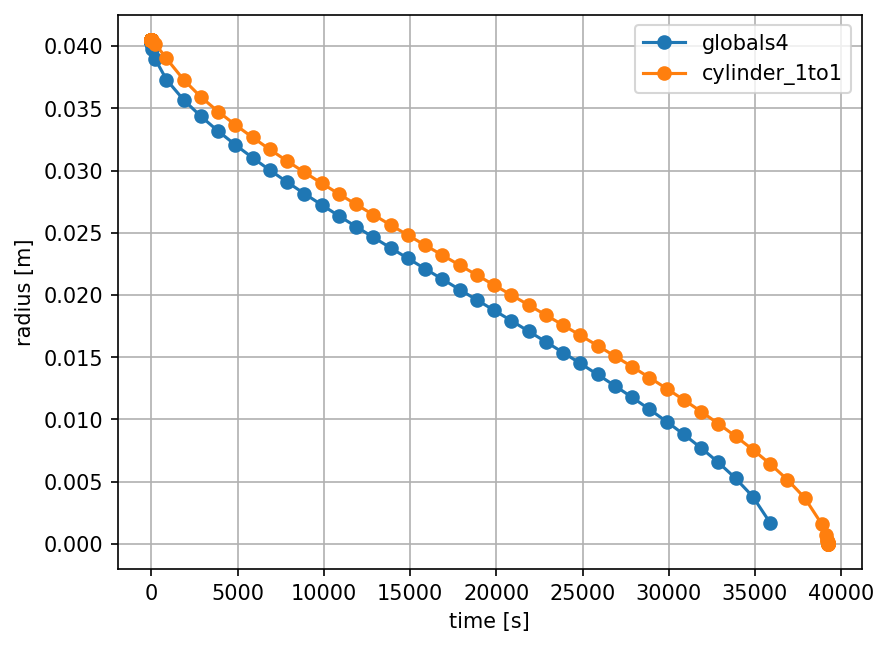

In [60]:
_,ax = plt.subplots(dpi=150)
_,ax1 = plt.subplots(dpi=150)
for typ in ['globals4','cylinder_1to1']:
    r,drdt = np.genfromtxt(f'/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/floating/codes/floatingIce/duarte/{typ}.txt')[2:,-2:].T
    time = np.genfromtxt(f'/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/floating/codes/floatingIce/duarte/{typ}.txt')[2:,0]
    # r = np.genfromtxt(f'/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/floating/codes/floatingIce/duarte/{typ}.txt')[1:,-2]
    ax1.plot(time,r,label=f'{typ}',marker='o')
    # ax.plot(r**3,-r*np.gradient(r),label=f'{typ}')
    ax.plot(Ra(r=r,T1=-16,T2=20),-r*drdt*2*np.pi*rho_ice*(L_f+c_s*(-16.))/(np.pi*20.)/kappa,label=f'{typ}',marker='o')
    # ax.scatter(time/time[-1],-r*drdt,label=f'{typ}',marker='o')

ax.set(xlabel='Rayleigh',ylabel='Nusselt',xscale='log',yscale='log',xlim=(1e3,7e9),ylim=(1e-1,1e1))
ax.plot(np.logspace(4,8.5,50),.5*np.logspace(-1,2,50)**(1/3),linestyle='--',c='k',label=r'$Nu=Ra^{1/3}$')
ax.plot(np.logspace(3,8.5,50),.3*np.logspace(-1,2,50)**(1/3.5),linestyle='-.',c='k',label=r'$Nu=Ra^{1/3.5}$')
for axi in [ax,ax1]:
    axi.legend()
    axi.grid()

ax1.set_xlabel('time [s]')
ax1.set_ylabel('radius [m]')

plt.show()
